1) You roll a fair 6-sided die 3 times. If the sum of the 3 rolls is 10 or greater, you win. Otherwise, you lose. What is the probability that you win?

First strategy: empirical. Generate all possible outcomes.

In [1]:
# All the combinations of 3 die-rolls
import itertools

combs = [p for p in itertools.product([1, 2, 3, 4, 5, 6], repeat=3)]
len(combs) == 6*6*6 == 216

True

In [2]:
# All the ways to get a sum of 18 (the maximum sum: 6 + 6 + 6 = 18)
len([i for i in combs if sum(i) == 18])

1

In [3]:
# The ways to get sums ranging from 3 (smallest possible) to 18 (largest possible)
s = []
for k in range(3, 18+1):
    s.append(len([i for i in combs if sum(i) == k]))
    
s

[1, 3, 6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10, 6, 3, 1]

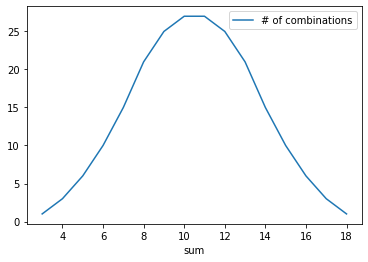

In [4]:
# Visualize the probability distribution

import pandas as pd

df = pd.DataFrame({'sum': list(range(3, 18+1)), '# of combinations': s})

df.plot('sum')

In [5]:
# The ways to get 10 or more
sums = 0
for k in range(10, 18+1):
    sums += len([i for i in combs if sum(i) == k])
    
sums

135

In [6]:
print(f"There is a {sums / len(combs)} chance of winning")

There is a 0.625 chance of winning


Second strategy: bootstrap. Generate random tuples of 3 numbers between 1 and 6. Count the fraction that sum to 10 or more.

In [7]:
import numpy as np
np.random.seed(42)

nums = [sum(np.random.choice([1,2,3,4,5,6], 3, replace=True)) for i in range(99999)]
prob = len([i for i in nums if i >= 10]) / len(nums)
print(f"There is a {prob:.3f} chance of winning")

There is a 0.627 chance of winning
